<a href="https://colab.research.google.com/github/AgileDataScientist/data-analysis-bus-data/blob/main/NYCBusDelay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYC School Bus Delay Data**

In [ ]:
#!cp /content/drive/My Drive/DataAnalystPortfolio/DataAnalysisNYCSchoolBusDelayTime/bus.tar.gz /content/dataset
!pip install pyjanitor
!pip install dash
!pip install plotly

In [73]:
import pandas as pd
import numpy as np

# Plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

from jupyter_plotly_dash import JupyterDash
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

# Python dplyr
from janitor import clean_names

#from google.colab import drive
#drive.mount('/content/myDrive')

## **Read Data**

In [272]:
#bus_data = pd.read_csv('/content/myDrive/MyDrive/Data Analyst Portfolio/Data Analysis NYC School Bus Delay Time/Bus_Breakdown_and_Delays.csv')
bus_data = pd.read_csv('/content/sample_data/Bus_Breakdown_and_Delays.csv')

# Clean up feature names
bus_data = clean_names(bus_data) 

bus_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,school_year,busbreakdown_id,run_type,bus_no,route_number,reason,schools_serviced,occurred_on,created_on,boro,...,how_long_delayed,number_of_students_on_the_bus,has_contractor_notified_schools,has_contractor_notified_parents,have_you_alerted_opt,informed_on,incident_number,last_updated_on,breakdown_or_running_late,school_age_or_prek
0,2015-2016,1227538,Special Ed AM Run,2621,J711,Heavy Traffic,75003,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,New Jersey,...,NaN,11,Yes,No,Yes,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:12:14 AM,Running Late,School-Age
1,2015-2016,1227539,Special Ed AM Run,1260,M351,Heavy Traffic,06716,11/05/2015 08:10:00 AM,11/05/2015 08:12:00 AM,Manhattan,...,20MNS,2,Yes,Yes,No,11/05/2015 08:12:00 AM,NaN,11/05/2015 08:13:34 AM,Running Late,School-Age
2,2015-2016,1227540,Pre-K/EI,418,3,Heavy Traffic,C445,11/05/2015 08:09:00 AM,11/05/2015 08:13:00 AM,Bronx,...,15MIN,8,Yes,Yes,Yes,11/05/2015 08:13:00 AM,NaN,11/05/2015 08:13:22 AM,Running Late,Pre-K
3,2015-2016,1227541,Special Ed AM Run,4522,M271,Heavy Traffic,02699,11/05/2015 08:12:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,15 MIN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:04 AM,Running Late,School-Age
4,2015-2016,1227542,Special Ed AM Run,3124,M373,Heavy Traffic,02116,11/05/2015 08:13:00 AM,11/05/2015 08:14:00 AM,Manhattan,...,NaN,6,No,No,No,11/05/2015 08:14:00 AM,NaN,11/05/2015 08:14:08 AM,Running Late,School-Age


In [ ]:
bus_data.info()

In [ ]:
# Missing data
bus_data.isnull().sum()

In [ ]:
# Unique values feature
bus_data.nunique()

In [274]:
def bar_plot(df, column, horizontal = False):
  if horizontal:
    plt.barh(df[column].value_counts().sort_index().index, 
             df[column].value_counts().sort_index().values );
    plt.xlabel('Frequency Count')
  else:
    plt.bar(df[column].value_counts().sort_index().index, 
             df[column].value_counts().sort_index().values );
    plt.ylabel('Frequency Count')
  plt.title(column)
  plt.rcParams['figure.figsize'] = (10, 5)
  plt.tight_layout()
  plt.show()

In [271]:
bus_data.columns

Index(['school_year', 'busbreakdown_id', 'run_type', 'bus_no', 'route_number',
       'reason', 'schools_serviced', 'occurred_on', 'created_on', 'boro',
       'bus_company_name', 'how_long_delayed', 'number_of_students_on_the_bus',
       'has_contractor_notified_schools', 'has_contractor_notified_parents',
       'have_you_alerted_opt', 'informed_on', 'incident_number',
       'last_updated_on', 'breakdown_or_running_late', 'school_age_or_prek',
       'delay_interval', 'max_delay', 'max_cap_delay'],
      dtype='object')

In [ ]:
# Counts for School Year
bar_plot(bus_data, 'school_year' )

In [ ]:
# Run Type counts
bar_plot(bus_data, 'run_type', True)

In [ ]:
# Counts of reason for lateness
bar_plot(bus_data, 'reason', True)

In [ ]:
# Run_type counts 
bar_plot(bus_data, 'boro', True)

In [281]:
bus_data['bus_company_name'].str.lower().value_counts()

leesel transportation corp (b2192)     66488
pioneer transportation corp            30959
g.v.c., ltd.                           28563
boro transit, inc.                     25545
reliant transportation, inc (b2321)    23992
                                       ...  
r & c transit, inc. (b2321)                1
alina                                      1
l&m bus corp.                              1
iy                                         1
guillen rodriguez                          1
Name: bus_company_name, Length: 132, dtype: int64

In [284]:
bus_data['incident_number'].nunique()
bus_data['incident_number'].value_counts(dropna=False)

NaN           518825
X               1043
x                118
e                 65
90558530          33
               ...  
90267100           1
90267079           1
90267010           1
90266920           1
91222837.0         1
Name: incident_number, Length: 7870, dtype: int64

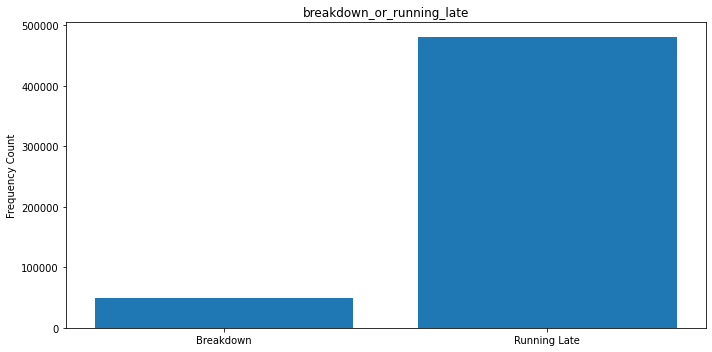

In [285]:
bar_plot(bus_data, 'breakdown_or_running_late' )

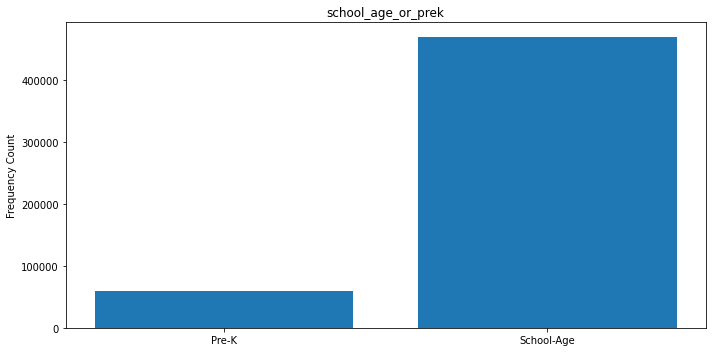

In [286]:
bar_plot(bus_data, 'school_age_or_prek')

In [194]:
bus_data['delay_interval'] = bus_data['how_long_delayed'].str.extract('([0-9]+-[0-9]+)', expand=False)
bus_data['delay_interval'].value_counts()

31-45    116145
16-30    107832
46-60     62185
0-15      38306
61-90     24017
          ...  
20-15         1
5-1           1
10-18         1
20-20         1
15-10         1
Name: delay_interval, Length: 76, dtype: int64

In [196]:
import re

def max_time_delayed(statement):
  if statement != '':
    value = re.findall('\d+', str(statement))
    length = len(value)
    if length > 0:
      #print(value, len(value), value[length-1])
      return int(value[length-1])

bus_data['max_delay'] = bus_data['how_long_delayed'].apply(max_time_delayed)
bus_data['max_delay'].value_counts(dropna=False)
bus_data['max_delay'].describe()

count    475828.000000
mean         39.665837
std         323.817987
min           0.000000
25%          30.000000
50%          30.000000
75%          45.000000
max      202340.000000
Name: max_delay, dtype: float64

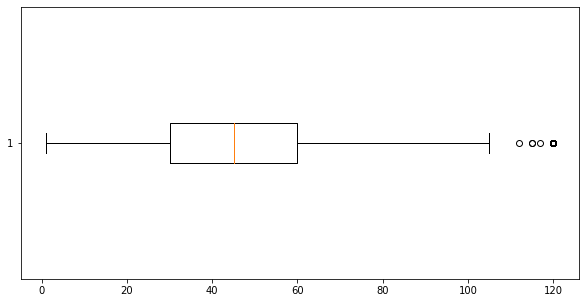

In [206]:
def cap_off_delay(statement):
  if 0 < statement < 120:
    return statement
  return 120

bus_data['max_cap_delay'] = bus_data['max_delay'].apply(cap_off_delay)
plt.boxplot(bus_data['max_cap_delay'], vert=0);
#bus_data['max_cap_delay'].describe().T

In [208]:
bus_data.columns

Index(['school_year', 'busbreakdown_id', 'run_type', 'bus_no', 'route_number',
       'reason', 'schools_serviced', 'occurred_on', 'created_on', 'boro',
       'bus_company_name', 'how_long_delayed', 'number_of_students_on_the_bus',
       'has_contractor_notified_schools', 'has_contractor_notified_parents',
       'have_you_alerted_opt', 'informed_on', 'incident_number',
       'last_updated_on', 'breakdown_or_running_late', 'school_age_or_prek',
       'delay_interval', 'max_delay', 'max_cap_delay'],
      dtype='object')

In [211]:
bus_data[['breakdown_or_running_late','delay_interval', 'max_delay', 'max_cap_delay']].head()

,breakdown_or_running_late,delay_interval,max_delay,max_cap_delay
0,Running Late,NaN,NaN,120.0
1,Running Late,NaN,20.0,20.0
2,Running Late,NaN,15.0,15.0
3,Running Late,NaN,15.0,15.0
4,Running Late,NaN,NaN,120.0


In [214]:
bus_data.groupby('breakdown_or_running_late')['has_contractor_notified_schools'].value_counts(dropna=False)

breakdown_or_running_late  has_contractor_notified_schools
Breakdown                  Yes                                 41599
                           No                                   7217
Running Late               Yes                                420466
                           No                                  60413
Name: has_contractor_notified_schools, dtype: int64

In [217]:
# Explore reason
bus_data.groupby('reason')['breakdown_or_running_late'].value_counts(dropna=False)

reason                       breakdown_or_running_late
Accident                     Running Late                   4340
                             Breakdown                       461
Delayed by School            Running Late                   3791
                             Breakdown                        15
Flat Tire                    Running Late                   6921
                             Breakdown                      6434
Heavy Traffic                Running Late                 330624
                             Breakdown                       659
Late return from Field Trip  Running Late                   8020
                             Breakdown                        49
Mechanical Problem           Running Late                  25938
                             Breakdown                     24769
Other                        Running Late                  71646
                             Breakdown                      5364
Problem Run                  Runnin

In [216]:
bus_data.groupby('reason')['has_contractor_notified_schools'].value_counts(dropna=False)

reason                       has_contractor_notified_schools
Accident                     Yes                                  4190
                             No                                    611
Delayed by School            Yes                                  3366
                             No                                    440
Flat Tire                    Yes                                 11585
                             No                                   1770
Heavy Traffic                Yes                                292851
                             No                                  38432
Late return from Field Trip  Yes                                  7059
                             No                                   1010
Mechanical Problem           Yes                                 41796
                             No                                   8911
Other                        Yes                                 64944
                